# Measurement of dipole trap parameters

Dipole trap potential can be written as $U(x,y,z)=U_0 \left(1 - \frac{1}{1+(z/z_0)^2} \exp\left(-\frac{2(x^2+y^2)}{w_0^2(1+(z/z_0)^2)}\right) \right)$. 

Dipole trap is characterized by the following parameters.

- $U_0$ - trap depth

- $w_0$ - beam radius

- $z_0$ - Rayleigh range

- $\lambda$ - wavelength of the laser that creates dipole trap


To measure atom temperature, model atom excitation, simulate quantum circuits and etc. it is crucial to know parameters of dipole trap. 

$\lambda$ is fixed by the laser choice, $z_0$ is determined as $z_0 = \frac{\pi w_0^2}{\lambda}$, so there are two parameters left - $U_0$ and $w_0$.

____

__1. Measurement of $U_0$.__

We can determine $U_0$ by measuring AC Stark shift created by dipole trap. 
AC Stark due to the dipole trap shift would be exactly equal to the trap depth. 


__2. Measurment of $w_0$.__

There are currently two well-known methods to measure beam radius: parametric heating and turning trap on and off scheme. 

Both of them require $U_0$ to be fixed, so we can feet experimental data by modelled curve that depends only on $w_0$.

$$z0 = \frac{\pi w_0^2}{\lambda}$$

$$\omega_r = \sqrt{\frac{4 U_0}{m}}\frac{1}{w_0}, \;\;\; \omega_z = \sqrt{\frac{2 U_0}{m}}\frac{1}{z_0} =\sqrt{\frac{2 U_0}{m}}\frac{\lambda}{\pi w_0^2} = \omega_r \frac{\lambda}{\sqrt{2}  \pi w_0}$$

$$ \Delta\omega = \omega_z - \omega_r = \omega_r \left( 1 - \frac{\lambda}{\sqrt{2}  \pi w_0} \right)$$


$$ w_0 = \frac{\lambda}{\sqrt{2}{\pi}} \frac{1}{1 - \Delta \omega / \omega_r}$$

__3. Real__


In [1]:
using PyPlot
using DataFrames
using CSV

include("../src/ColdAtoms.jl")
using .ColdAtoms

In [169]:
include("../params/default.jl")

2-element Vector{Float64}:
  9.42477796076938
 28.274333882308138

## AC Stark shifts. Trap depth.

┌ Warning: thread = 1 warning: parsed expected 41 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:578
┌ Warning: thread = 1 warning: error parsing Float64 around row = 1, col = 51: " 173.000000 
│ ", error=INVALID: NEWLINE | INVALID_DELIMITER 
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:580
┌ Warning: thread = 1 warning: error parsing Float64 around row = 2, col = 51: " 174.000000 
│ ", error=INVALID: NEWLINE | INVALID_DELIMITER 
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:580
┌ Warning: thread = 1 warning: error parsing Float64 around row = 3, col = 51: " 175.000000 
│ ", error=INVALID: NEWLINE | INVALID_DELIMITER 
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:580
┌ Warning: thread = 1 warning: error parsing Float64 around row = 4, col = 51: " 176.000000 
│ ", error=INVALID: NEWLINE | INVALID_DELIMITER 
└ @ CSV /

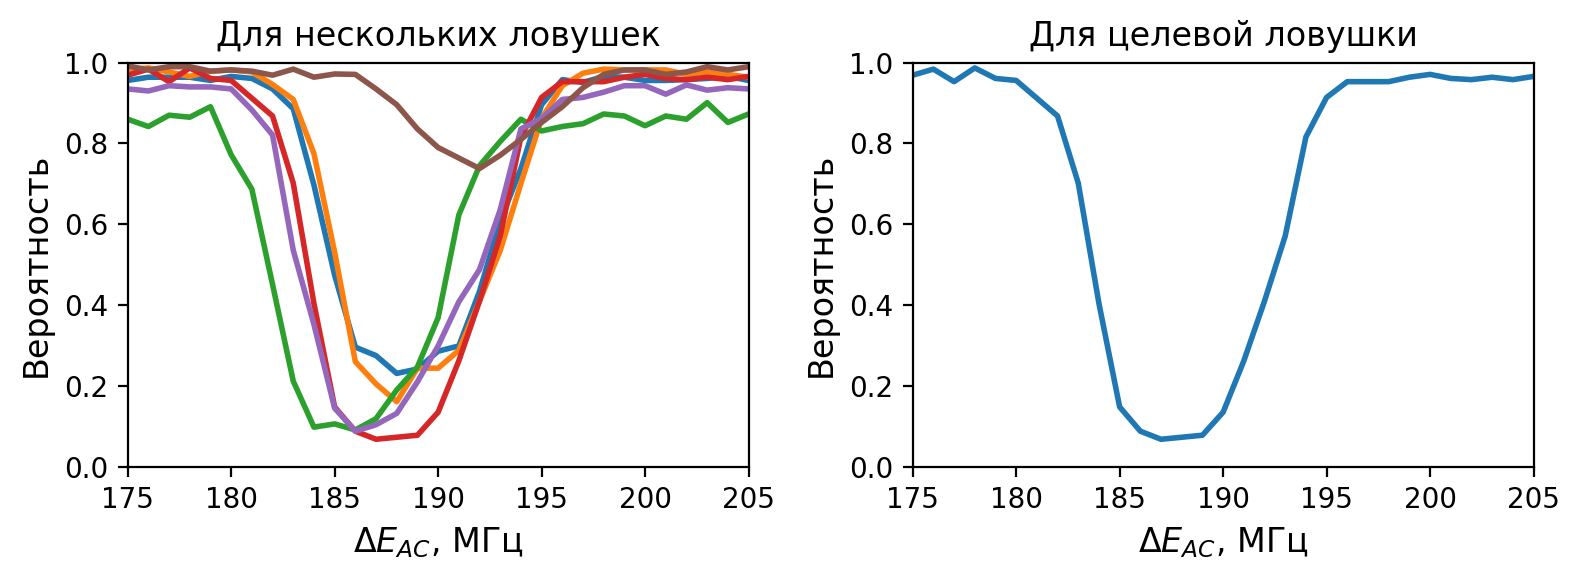

In [69]:
filename_AC = "../data/2023_11_13_array_AC_Stark_shift.dat";
linewidth=2;
fontsize=12;

df_AC = DataFrame(CSV.File(filename_AC, header=21, delim="  ", types=Float64))
x = df_AC[1:end,2]
y1 = df_AC[1:end, 6]
y2 = df_AC[1:end, 14]
y3 = df_AC[1:end, 22]
y4 = df_AC[1:end, 30]
y5 = df_AC[1:end, 38]
y6 = df_AC[1:end, 46]

figure(figsize=(8,3), dpi=200)
subplot(121)
plot(x, y1, linewidth=linewidth)
plot(x, y2, linewidth=linewidth)
plot(x, y3, linewidth=linewidth)
plot(x, y4, linewidth=linewidth)
plot(x, y5, linewidth=linewidth)
plot(x, y6, linewidth=linewidth)

xlim(175.0, 205.0)
ylim(0.0, 1.0)
xlabel("\$ \\Delta E_{AC}\$, МГц", fontsize=fontsize)
ylabel("Вероятность", fontsize=fontsize)
title("Для нескольких ловушек")

subplot(122)
plot(x, y4, linewidth=linewidth)

xlim(175.0, 205.0)
ylim(0.0, 1.0)
xlabel("\$ \\Delta E_{AC}\$, МГц", fontsize=fontsize)
ylabel("Вероятность", fontsize=fontsize)
title("Для целевой ловушки")

tight_layout()

savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/AC_Stark.png", dpi=300)
savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/AC_Stark.pdf", dpi=300)
savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/AC_Stark.svg", dpi=300)

gcf()

In [36]:
function AC_Measure(α, τ)
    return 0.5 * (1.0 .+ cos.(sqrt.(1.0 .+ α .^ 2) * τ)) ./ (1.0 .+ α .^2);
end;

In [181]:
(1.054 * 10^(-34) * 2*π * 15 * 10^6) / (1.38 * 10^(-23)) / 10^(-6)

719.834490626879

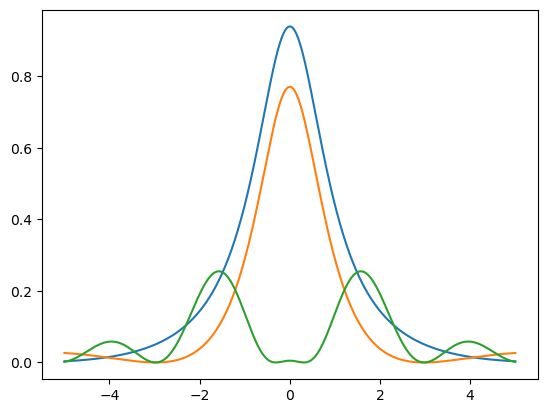

In [79]:
α = [-5.0:0.01:5.0;];
figure()

for τ ∈ [0.5, 1.0, 3.0]
    plot(α, AC_Measure(α, τ));
end;
gcf()

In [7]:
(1.054 * 10^(-34) * 187.5 * 1e6)/(1.38 * 10^(-23)) * 1e6

1432.0652173913047

## Trap frequencies. Parametric heating.

In [164]:
filename_parametric1 = "../data/2023_10_30_RESONANCE_SCAN.dat"
filename_parametric2 = "../data/2023_10_30_resonance_freq_modAmpl0.12.dat"
filename_parametric3 = "../data/2023_10_30_resonance_freq_modAmpl0.09.dat"

df_parametric1 = DataFrame(CSV.File(filename_parametric1, header=21, delim=" ", types=Float64))
df_parametric2 = DataFrame(CSV.File(filename_parametric2, header=21, delim=" ", types=Float64))
df_parametric3 = DataFrame(CSV.File(filename_parametric3, header=21, delim=" ", types=Float64))

x1 = df_parametric1[1:end, 5]
x2 = df_parametric2[1:end, 5]
x3 = df_parametric3[1:end, 5]
y1 = df_parametric1[1:end, 13]
y2 = df_parametric2[1:end, 13]
y3 = df_parametric3[1:end, 13]

figure(figsize=(8,4), dpi=250)
plot(1e3 * x1, 1.0 .- y1, color="red", linewidth=linewidth)
plot(1e3 * x3, 1.0 .- y3, color="orange", linewidth=linewidth)

axvline(52, 0.0, 0.6, color="black", linestyle="--", zorder=-2)
axvline(290, 0.0, 0.9, color="black", linestyle="--", zorder=-2)

text(58, 0.62, "\$ 2\\omega_z /2\\pi = 2 \\times 26 \$ кГц"; horizontalalignment="center", fontsize=10)
text(290, 0.92, "\$ 2\\omega_r /2\\pi = 2\\times 145  \$ кГц"; horizontalalignment="center", fontsize=10)

xlim(10.0, 400.0)
ylim(0.0, 1.0)
xlabel("Частота модуляции \$ \\omega / 2\\pi \$, кГц", fontsize=12)
ylabel("Вероятность вылета", fontsize=12)
tight_layout()
gcf()

savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/parametric.png", dpi=250)
savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/parametric.pdf", dpi=250)
savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/parametric.svg", dpi=250)

In [97]:
(sqrt(4 * 1.38 * 4000 * 10^(-29) / (1.67 * 87 * 10^(-27))) / (2*π * 168 * 10^3)) / 10^(-6)

1.1678646756784

In [168]:
(1.054 * 10^(-34) * (187.5 * 10^6) / (1.38 * 10^(-23))) / 10^(-6)

1432.065217391305

In [167]:
ωr = 2.0*π * 0.145;
ωz = 2.0*π * 0.026;

ωr_alt = ωr / 0.9;
ωz_alt = ωz / 0.9;

U0 = 1438.0;

println()
println("Without correction:")
println(get_trap_params(ωr, ωz, U0, 0.852; dif=true))
println(get_trap_params(ωr, ωz, U0, 0.852; dif=false))

println()
println("With correction:")
println(get_trap_params(ωr_alt, ωz_alt, U0, 0.852; dif=true))
println(get_trap_params(ωr_alt, ωz_alt, U0, 0.852; dif=false))


Without correction:
(1.0694719009427776, 4.217441186520781, 2171.3049241098993)
(0.813802527583906, 3.2092140938920455, 1438.0)

With correction:
(1.0694719009427776, 4.217441186520781, 2680.6233630986408)
(0.7324222748255155, 2.888292684502841, 1438.0)


In [6]:
println((sqrt(4.0 * 1438.0 * 1.38 * 10^(-23) / (1.67 * 10^(-27) * 87.0)) / 1.0) /(2.0*π))
println((sqrt(2.0 * 1438.0 * 1.38 * 10^(-23) / (1.67 * 10^(-27) * 87.0)) / 4.23) /(2.0*π))

117.63898037575609
19.665087649070525


In [115]:
ωr = 2.0 * π * 140 * 10^(-3);
ωz = 2.0 * π * 25 * 10^(-3);
U0 = 10000.0;
λ = 0.852;

get_trap_params(ωr, ωz, U0, λ; m = 87.0, dif=true)

(1.073897301912196, 4.252416361088285, 2024.1415701571477)

## Atom temperature. Release&Recapture.

In [170]:
filename_temperature = "../data/2023_09_10_release_recapture.dat"

df_temperature = DataFrame(CSV.File(filename_temperature, delim=" ", header=19, ignorerepeated=true, types=Float64))
x = df_temperature[1:end, 1];
y = df_temperature[1:end, 2];

┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 1. Filling remaining columns with `missing`
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 2. Filling remaining columns with `missing`
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 3. Filling remaining columns with `missing`
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 4. Filling remaining columns with `missing`
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 5. Filling remaining columns with `missing`
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 6. Filling r

┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 57. Filling remaining columns with `missing`
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 58. Filling remaining columns with `missing`
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 59. Filling remaining columns with `missing`
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 60. Filling remaining columns with `missing`
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 61. Filling remaining columns with `missing`
└ @ CSV /Users/goloshch/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 4 / 5 columns around data row: 62. Fil

In [173]:
U0

574.0

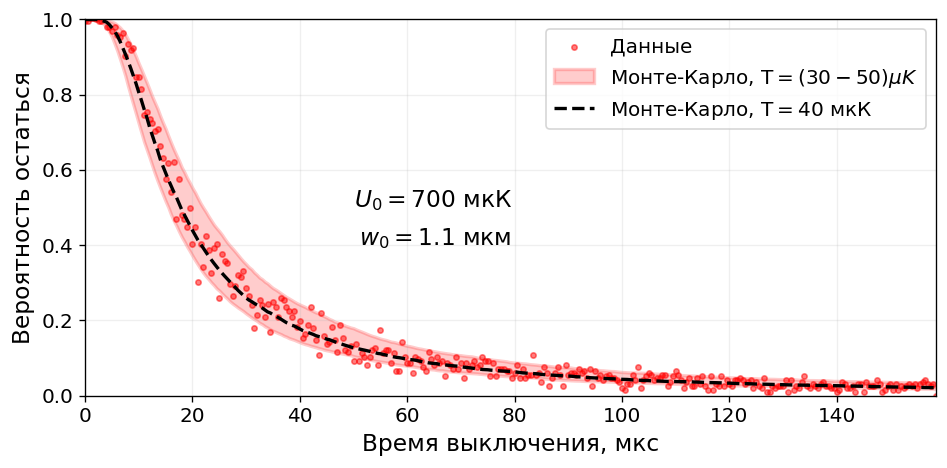

In [198]:
fontsize = 14;
linewidth = 2.0;

T0 = 40.0;
T_low = 30.0;
T_high = 50.0;
atom_params_temp0 = [86.9091835, T0];
atom_params_temp_low = [86.9091835, T_low];
atom_params_temp_high = [86.9091835, T_high];
trap_params_temp = [700, 1.1, 4.22]

N = 10000;
prob0, _ = release_recapture(x, trap_params_temp, atom_params_temp0, N; freq=10, skip=1000)
prob_low, _ = release_recapture(x, trap_params_temp, atom_params_temp_low, N; freq=10, skip=1000)
prob_high, _ = release_recapture(x, trap_params_temp, atom_params_temp_high, N; freq=10, skip=1000)

figure(figsize=(8,4), dpi=120)
# scatter(x, y ./ 0.98, color="red", s=10, alpha=0.5, zorder=2, label="Data")
# fill_between(x, prob_high, prob_low, color="red", linewidth=linewidth, alpha=0.2, label="Fit, T\$=(35-60)\\mu K \$")
# plot(x, prob0, color="black", linewidth=linewidth, linestyle="--", label="Fit, T\$=45\\mu K \$")

scatter(x, y ./ 0.98, color="red", s=10, alpha=0.5, zorder=2, label="Данные")
fill_between(x, prob_high, prob_low, color="red", linewidth=linewidth, alpha=0.2, label="Монте-Карло, T\$=(30-50)\\mu K \$")
plot(x, prob0, color="black", linewidth=linewidth, linestyle="--", label="Монте-Карло, T\$=40 \$ мкК")
# xlabel("Release time, μs", fontsize=fontsize)
# ylabel("Recapture probability", fontsize=fontsize)

xlabel("Время выключения, мкс", fontsize=fontsize)
ylabel("Вероятность остаться", fontsize=fontsize)

xticks(fontsize=fontsize-2)
yticks(fontsize=fontsize-2)
xlim(0.0, maximum(x))
ylim(0.0, 1.0)
grid(alpha=0.2)
# title("Release&Recapture, Monte-Carlo fit", fontsize=fontsize)
legend(fontsize=fontsize-2)
# text(60.0, 0.5, "\$ U_0 = 1450 \\mu K \$", fontsize=fontsize)
# text(61.0, 0.4, "\$ w_0 = 1.1 \\mu m \$", fontsize=fontsize)
text(50.0, 0.5, "\$ U_0 = 700 \$ мкК", fontsize=fontsize)
text(51.0, 0.4, "\$ w_0 = 1.1 \$ мкм", fontsize=fontsize)
# text(60.0, 0.5, "\$ U_0 = 1450 \\mu K, w_0 = 1.1 \\mu m \$", fontsize=fontsize)
tight_layout()

savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/temperature.png", dpi=300)
savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/temperature.pdf", dpi=300)
savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/temperature.svg", dpi=300)
gcf()

## Blue laser

In [ ]:
#Power of blue laser
P  = 65.3 * 1e-3;              #in W
w0 = 4.5;                      #in μm
I0 = 1.15823*10^9;             #in W/m^2
Ωb_calculated = 2π * 60;       #in 2π × MHz


### Utilities

__Utilities__

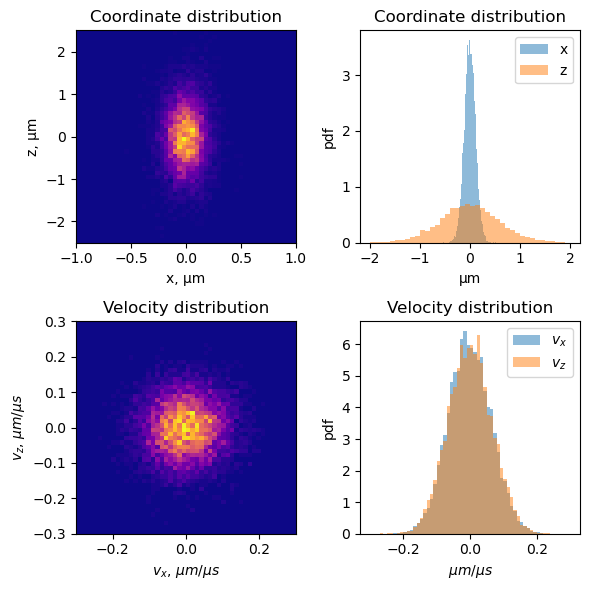

In [16]:
w0 = 1.0;
λ = 0.852;
z0 = π * w0^2/λ;

atom_params = [m, 43.0];
trap_params = [1000.0, w0, z0];

tspan = [0.0:0.1:120.0;];

samples, acc_rate = samples(trap_params, atom_params, 10000; freq=5, skip=2000);

samples_visualise(samples)

### Release&recapture

<img src="images/release_recap.png" 
     align="left" 
     width="800" />

Basic idea of release&recapture method is to trap atoms in dipole trap, release them for some variable time $\Delta t$ and measure the probability of atom to stay in the trap. If the atom is hot, it would leave the trap with high probability. The idea is to measure atoms' temperature by scanning $\Delta t$ and measuring survivial probability.

In [17]:
function is_zero(x)
    return x == 0
end;


function evolve(tspan, cord, atom_params, trap_params)
    xi, yi, zi, vxi, vyi, vzi = cord;
    m, T = atom_params;
    U0, w0, z0 = trap_params;
    
    x = xi .+ vxi * tspan;
    y = yi .+ vyi * tspan - g * tspan .^2;
    z = zi .+ vzi * tspan;
    
    kinetic = K(cord, trap_params, m);
    potential = U0 .* (1.0 .- A(x, y, z, w0, z0) .^2);
    recap = (kinetic .+ potential) .< U0;
    
    
    idx = findfirst(is_zero, recap);
    
    if idx != nothing
        recap[idx:end] .= 0;
    end;
    
    return recap
end; 

In [18]:
function release_recapture(tspan, trap_params, atom_params, N; freq=10, skip=1000)
    samples, acc_rate = boltzmann_samples(trap_params, atom_params, N; freq=freq, skip=skip);
    
    recapture = zeros(length(tspan));
    
    for i ∈ 1:N
        recapture += evolve(tspan, samples[i], atom_params, trap_params);
    end;
    
    return recapture ./ N, acc_rate
end;



function release_recapture_antitrapping(tspan, trap_params, atom_params, α, N; freq=10, skip=1000)
    samples, acc_rate = boltzmann_samples(trap_params, atom_params, N; freq=freq, skip=skip);
    
    recapture = zeros(length(tspan));
    
    for i ∈ 1:N
        recapture += evolve(tspan, samples[i], atom_params, trap_params);
    end;
    
    return recapture ./ N, acc_rate
end;

In [20]:
ωr = 2 * sqrt(1000/m)*vconst / w0;
ωz = sqrt(2) * sqrt(1000/m)*vconst /z0;

println(ωr *1e3 / (2π))
println(ωz *1e3 / (2π))

98.45423114530904
18.880309497997693


In [21]:
2*(sqrt(2) * sqrt(1000/m)*vconst / z0 * 1e3 / 2π)

37.76061899599539

Metropolis-Hastings sampler for atoms' coordinates and velocities in dipole trap. Sampling achieves Boltzman distribution for energies of atom in the dipole trap. 

In [22]:
recap1, acc_rate1 = release_recapture(tspan, trap_params, atom_params, 40000; freq=5, skip=10000);

recap2, acc_rate2 = release_recapture(tspan, trap_params, atom_params, 40000; freq=5, skip=10000);

recap3, acc_rate3 = release_recapture(tspan, trap_params, atom_params, 40000; freq=5, skip=10000);


println(acc_rate1)
println(acc_rate2)
println(acc_rate3)

0.2815809523809524
0.2825952380952381
0.2825238095238095


In [23]:
samples, acc_rate = boltzmann_samples(trap_params, atom_params, 10000; freq=5, skip=2000);

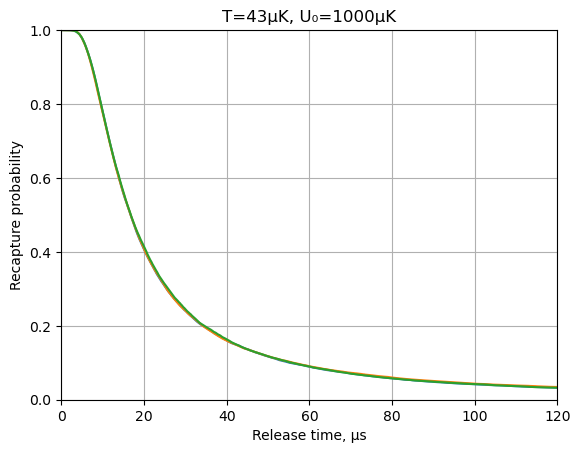

In [24]:
figure()
plot(tspan, recap1)
plot(tspan, recap2)
plot(tspan, recap3)

xlabel("Release time, μs")
ylabel("Recapture probability")
title("T=43μK, U₀=1000μK")
grid()
xlim(0.0, 120.0)
ylim(0.0,1.0)
gcf()

### Parametric heating of atom in dipole trap. Exact 3D case.

Dipole trap in harmonic approximation has two frequencies - radial and longitudinal. Cold enough atom oscillates with frequency $\omega_r$ along radial direction and with frequency $\omega_z$ along z-axis.


$\omega_r = \sqrt{\frac{4 U_0}{m}}\frac{1}{w_0}$ 

$\omega_z = \sqrt{\frac{2 U_0}{m}}\frac{1}{z_0}$ 

$z_0 = \frac{\pi w_0^2}{\lambda}$

By driving trap depth at $\sim 2\omega_r$ or $\sim 2\omega_z$ as $U(t) = U_0 (1 + \beta \sin(\omega t))$ we can excite parametric heating of atom. 

By measuring parametric resonance frequencies we can extract dipole trap parameters. 

#### Longitudinal parametric resonance

In [25]:
function f(x, y, z, params)
    U0, w0, z0 = params;
    return -4.0*U0*vconst^2/m*exp.(-2.0*(x .^ 2 + y .^ 2) ./ (w0^2*(1.0 .+ (z ./z0) .^ 2))) ./ (w0^2 * (1.0 .+ (z ./ z0) .^ 2) .^ 2)
end;



function atom_dynamics(du, u, params, t)
    U0, w0, z0, ω, β = params;
    x, y, z = u[1], u[2], u[3];
    vx, vy, vz = u[4], u[5], u[6];
    
    du[1], du[2], du[3] = vx, vy, vz;
    du[4] = (1.0 .+ β * sin.(ω * t)) * f(x, y, z, params) * x;
    du[5] = (1.0 .+ β * sin.(ω * t)) * f(x, y, z, params) * y;
    du[6] = (1.0 .+ β * sin.(ω * t)) * f(x, y, z, params) * (w0^2/(2.0 * z0^2) .- (x .^2 + y .^2)./(z .^2 .+ z0^2)) * z; 
end;

In [281]:
tspan = (0.0, 2e3);

ω_list = [0.0:0.0025:0.4;];
res_adaptive = zeros(length(ω_list));
step = 10;

@showprogress for j in 1:length(ω_list)
    @showprogress for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.4]);
        sol = solve(prob, dt=1.0);
        res_adaptive[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

res_adaptive = res_adaptive ./ (length(samples)/step);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:26
Progress: 100%|█████████████████████████████████████████| Time: 0:00:23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:22
Progress: 100%|█████████████████████████████████████████| Time: 0:00:22
Progress: 100%|█████████████████████████████████████████| Time: 0:00:23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:22
Progress: 100%|█████████████████████████████████████████| Time: 0:00:22
Progress: 100%|█████████████████████████████████████████| Time: 0:00:21
Progress: 100%|█████████████████████████████████████████| Time: 0:00:22
Progress: 100%|█████████████████████████████████████████| Time: 0:00:21
Progress: 100%|█████████████████████████████████████████| Time: 0:00:21
Progress: 100%|█████████████████████████████████████████| Time: 

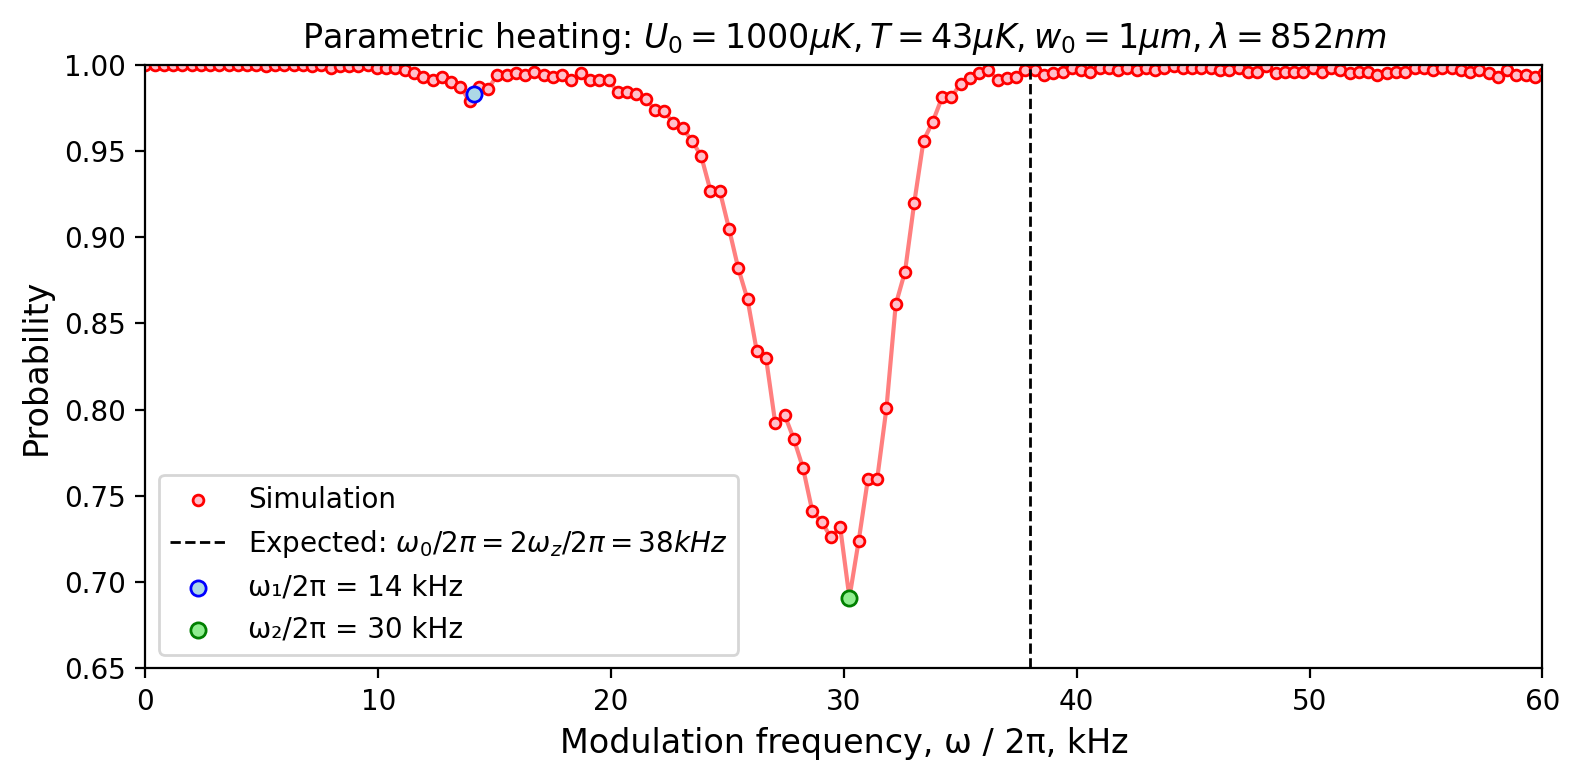

In [298]:
figure(figsize=(8,4), dpi=200)
idx = 40
plot(ω_list * 1e3 / 2π, res_adaptive, color="red", zorder=-2, alpha=0.5)
scatter(ω_list * 1e3 / 2π, res_adaptive, 
    color="pink", 
    s=15, 
    label="Simulation",
    edgecolor="red")
axvline(38.0, color="black", 
    linestyle="--", 
    linewidth=1, 
    label="Expected: \$ \\omega_0 / 2 \\pi =  2 \\omega_z / 2 \\pi = 38 kHz  \$")

idx1 = 36
scatter((ω_list[idx1] + ω_list[idx1+1])/2 * 1e3 / 2π, (res_adaptive[idx1]+res_adaptive[idx1+1])/2, 
    color="lightblue", 
    edgecolor="blue",
    s=30, label="ω₁/2π = 14 kHz", zorder=2)

idx2 = 77
scatter(ω_list[idx2] * 1e3 / 2π,res_adaptive[idx2], 
    color="lightgreen", 
    s=30, label="ω₂/2π = 30 kHz", zorder=2,
    edgecolor="green")

xlabel("Modulation frequency, ω / 2π, kHz", fontsize=12)
ylabel("Probability", fontsize=12)

xlim(0.0, 60.0)
ylim(0.65,1.0)

legend()
title("Parametric heating: \$ U_0 = 1000 \\mu K, T=43 \\mu K, w_0 = 1 \\mu m ,\\lambda = 852 nm \$")

tight_layout()
savefig("data/parametric_test_fine.pdf", dpi=300)

In "Anharmonic parametric excitation in optical lattices" article the potential is cosine, which is the closest to harmonic approximation compared to gauss(dipole trap along x- and y-axis), lorenz(optical trap along z-axis)

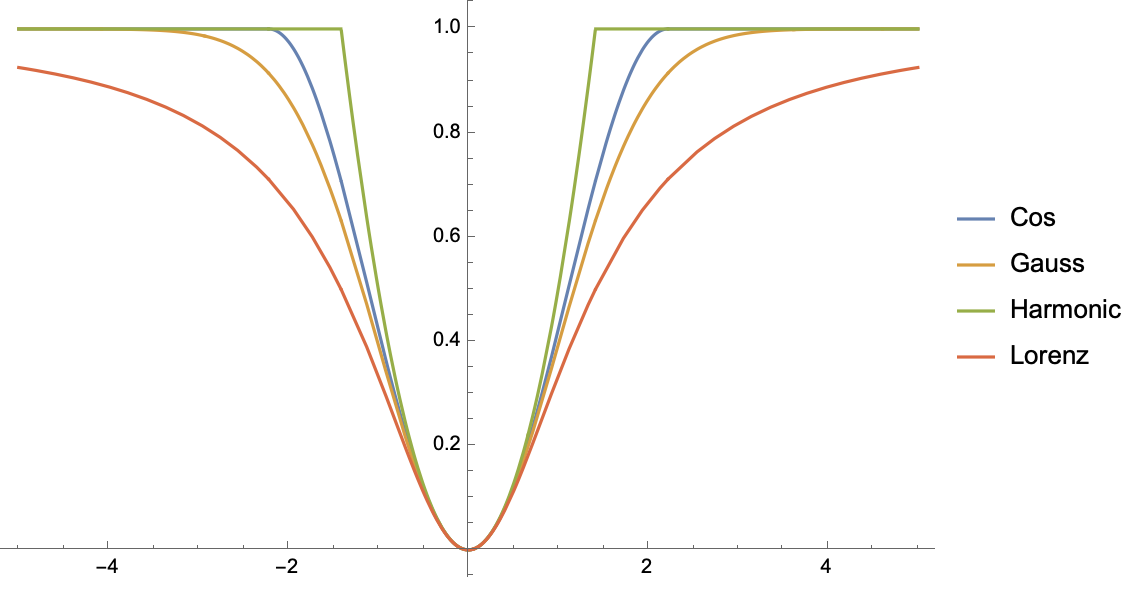

In [40]:
tspan = (0.0, 4e3);
ω_list = [0.0:0.0025:0.5;];
step = 10;

res_020 = zeros(length(ω_list));
res_025 = zeros(length(ω_list));
res_030 = zeros(length(ω_list));
res_035 = zeros(length(ω_list));
res_040 = zeros(length(ω_list));

#Messy code, I'm a bit tired :(
@showprogress for j in 1:length(ω_list)
    for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.2]);
        sol = solve(prob, dt=1.0);
        res_020[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

@showprogress for j in 1:length(ω_list)
    for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.25]);
        sol = solve(prob, dt=1.0);
        res_025[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

@showprogress for j in 1:length(ω_list)
    for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.3]);
        sol = solve(prob, dt=1.0);
        res_030[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

@showprogress for j in 1:length(ω_list)
    for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.35]);
        sol = solve(prob, dt=1.0);
        res_035[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

@showprogress for j in 1:length(ω_list)
    for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.4]);
        sol = solve(prob, dt=1.0);
        res_040[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;
            
res_020 = res_020 ./ (length(samples)/step);
res_025 = res_025 ./ (length(samples)/step);
res_030 = res_030 ./ (length(samples)/step);
res_035 = res_035 ./ (length(samples)/step);
res_040 = res_040 ./ (length(samples)/step);

Progress: 100%|█████████████████████████████████████████| Time: 2:18:35
Progress: 100%|█████████████████████████████████████████| Time: 2:16:58
Progress: 100%|█████████████████████████████████████████| Time: 2:15:12
Progress: 100%|█████████████████████████████████████████| Time: 2:12:57
Progress: 100%|█████████████████████████████████████████| Time: 5:45:35m29m


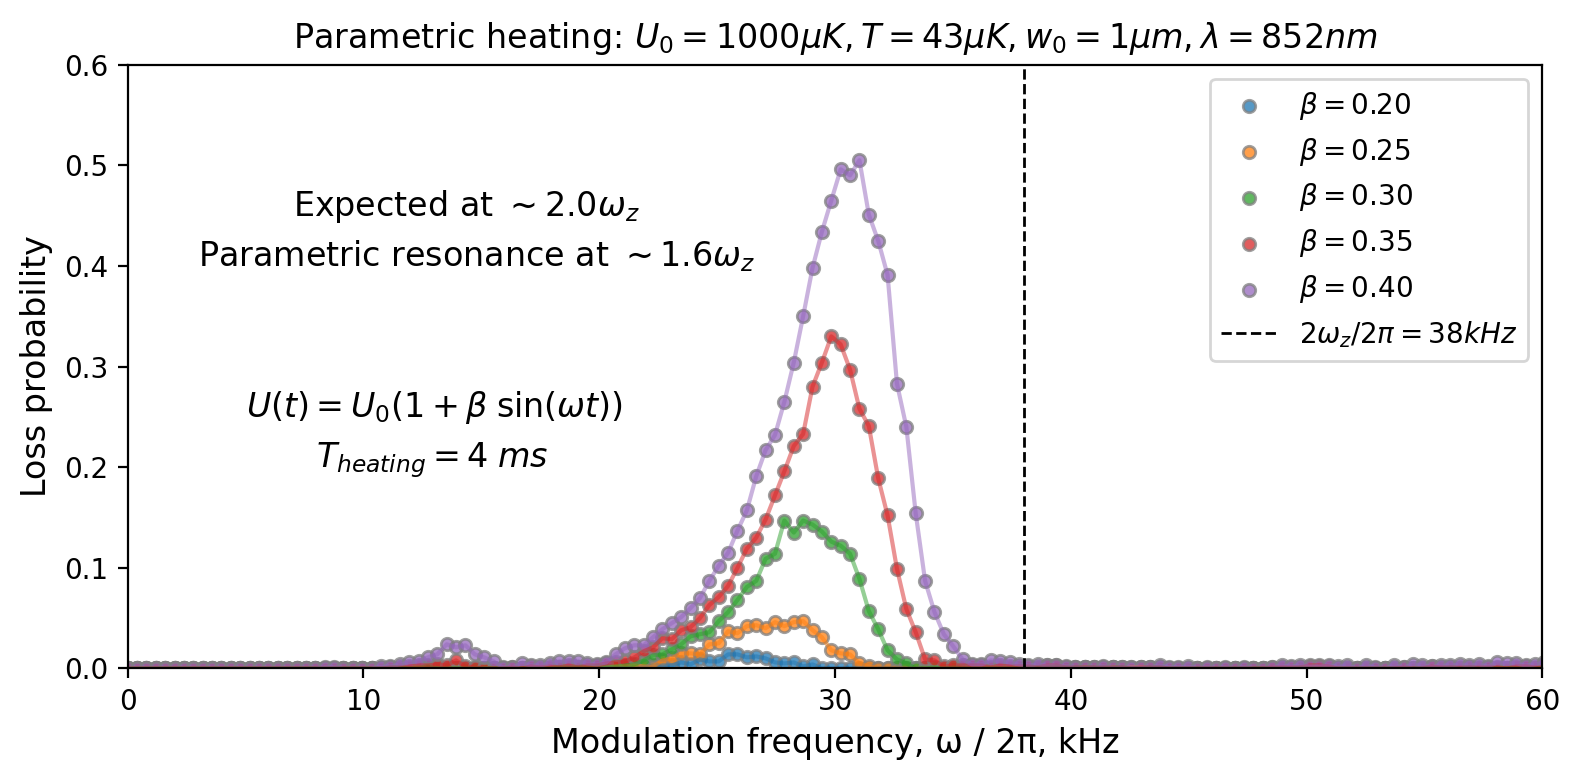

In [123]:
figure(figsize=(8,4), dpi=200)

#Another cringe
plot(ω_list * 1e3 / 2π, 1.0 .- res_020, alpha=0.5)
scatter(ω_list * 1e3 / 2π, 1.0 .- res_020,  
    s=20, 
    label="\$ \\beta = 0.20 \$", edgecolor="gray", alpha=0.75)

plot(ω_list * 1e3 / 2π, 1.0 .- res_025, alpha=0.5)
scatter(ω_list * 1e3 / 2π, 1.0 .-res_025,  
    s=20, 
    label="\$ \\beta = 0.25 \$", edgecolor="gray", alpha=0.75)

plot(ω_list * 1e3 / 2π, 1.0 .- res_030, alpha=0.5)
scatter(ω_list * 1e3 / 2π, 1.0 .- res_030,  
    s=20, 
    label="\$ \\beta = 0.30 \$", edgecolor="gray", alpha=0.75)

plot(ω_list * 1e3 / 2π, 1.0 .- res_035, alpha=0.5)
scatter(ω_list * 1e3 / 2π, 1.0 .- res_035,  
    s=20, 
    label="\$ \\beta = 0.35 \$", edgecolor="gray", alpha=0.75)

plot(ω_list * 1e3 / 2π, 1.0 .- res_040, alpha=0.5)
scatter(ω_list * 1e3 / 2π, 1.0 .- res_040,  
    s=20, 
    label="\$ \\beta = 0.40 \$", edgecolor="gray", alpha=0.75)


axvline(38.0, color="black", 
    linestyle="--", 
    linewidth=1, 
    label="\$ 2 \\omega_z / 2 \\pi = 38 kHz  \$")


xlabel("Modulation frequency, ω / 2π, kHz", fontsize=12)
ylabel("Loss probability", fontsize=12)

xlim(0.0, 60.0)
ylim(0.0,0.6)

legend()
title("Parametric heating: \$ U_0 = 1000 \\mu K, T=43 \\mu K, w_0 = 1 \\mu m ,\\lambda = 852 nm \$")
text(5, 1-0.75, "\$ U(t) = U_0 (1 + \\beta \\; \\sin(\\omega t))\$", fontsize=12)
text(8, 1-0.8, "\$ T_{heating} = 4 \\; ms\$", fontsize=12)

text(3, 1-0.6, "Parametric resonance at \$ \\sim 1.6 \\omega_z \$", fontsize=12)
text(7, 1-0.55, "Expected at \$ \\sim 2.0 \\omega_z \$", fontsize=12)

tight_layout()
savefig("data/parametric_test_many.pdf", dpi=300)

#### Radial parametric resonance

In [29]:
tspan = (0.0, 4e3);
ω_list = 2.0*π * 1e-3 * [100.0:2.0:220.0;];
step = 20;

res_020_radial = zeros(length(ω_list));

#Messy code, I'm a bit tired :(
@showprogress for j in 1:length(ω_list)
    for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.2]);
        sol = solve(prob, dt=1.0);
        res_020_radial[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

res_020_radial = res_020_radial ./ (length(samples)/step);

Progress: 100%|█████████████████████████████████████████| Time: 0:22:03


In [37]:
tspan = (0.0, 6e3);
ω_list = 2.0*π * 1e-3 * [100.0:2.0:220.0;];
step = 20;

res_010_radial = zeros(length(ω_list));

#Messy code, I'm a bit tired :(
@showprogress for j in 1:length(ω_list)
    for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.1]);
        sol = solve(prob, dt=1.0);
        res_010_radial[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

res_010_radial = res_010_radial ./ (length(samples)/step);

Progress: 100%|█████████████████████████████████████████| Time: 0:32:49


In [38]:
tspan = (0.0, 10e3);
ω_list_005 = 2.0*π * 1e-3 * [150.0:1.0:200.0;];
step = 20;

res_005_radial = zeros(length(ω_list_005));

@showprogress for j in 1:length(ω_list_005)
    for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list_005[j], 0.05]);
        sol = solve(prob, dt=1.0);
        res_005_radial[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

res_005_radial = res_005_radial ./ (length(samples)/step);

Progress: 100%|█████████████████████████████████████████| Time: 0:46:55


In [65]:
tspan = (0.0, 10e3);
ω_list = 2.0*π * 1e-3 * [100.0:2.0:220.0;];
step = 20;

res_010_10_radial = zeros(length(ω_list_010_50));

#Messy code, I'm a bit tired :(
@showprogress for j in 1:length(ω_list)
    for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.1]);
        sol = solve(prob, dt=1.0);
        res_010_10_radial[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

res_010_10_radial = res_010_10_radial ./ (length(samples)/step);

Progress: 100%|█████████████████████████████████████████| Time: 0:54:48


In [72]:
tspan = (0.0, 50e3);
ω_list_010_50_radial = 2.0*π * 1e-3 * [165.0:2.0:175.0;];
step = 20;

res_010_50_radial = zeros(length(ω_list));

#Messy code, I'm a bit tired :(
@showprogress for j in 1:length(ω_list_010_50_radial)
    @showprogress for i ∈ 1:step:length(samples)
        prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, ω_list_010_50_radial[j], 0.1]);
        sol = solve(prob, dt=1.0);
        res_010_50_radial[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

res_010_50_radial = res_010_50_radial ./ (length(samples)/step);

Progress: 100%|█████████████████████████████████████████| Time: 0:04:23
Progress: 100%|█████████████████████████████████████████| Time: 0:04:16
Progress: 100%|█████████████████████████████████████████| Time: 0:04:16
Progress: 100%|█████████████████████████████████████████| Time: 0:04:18
Progress: 100%|█████████████████████████████████████████| Time: 0:04:11
Progress: 100%|█████████████████████████████████████████| Time: 0:04:13
Progress: 100%|█████████████████████████████████████████| Time: 0:25:39


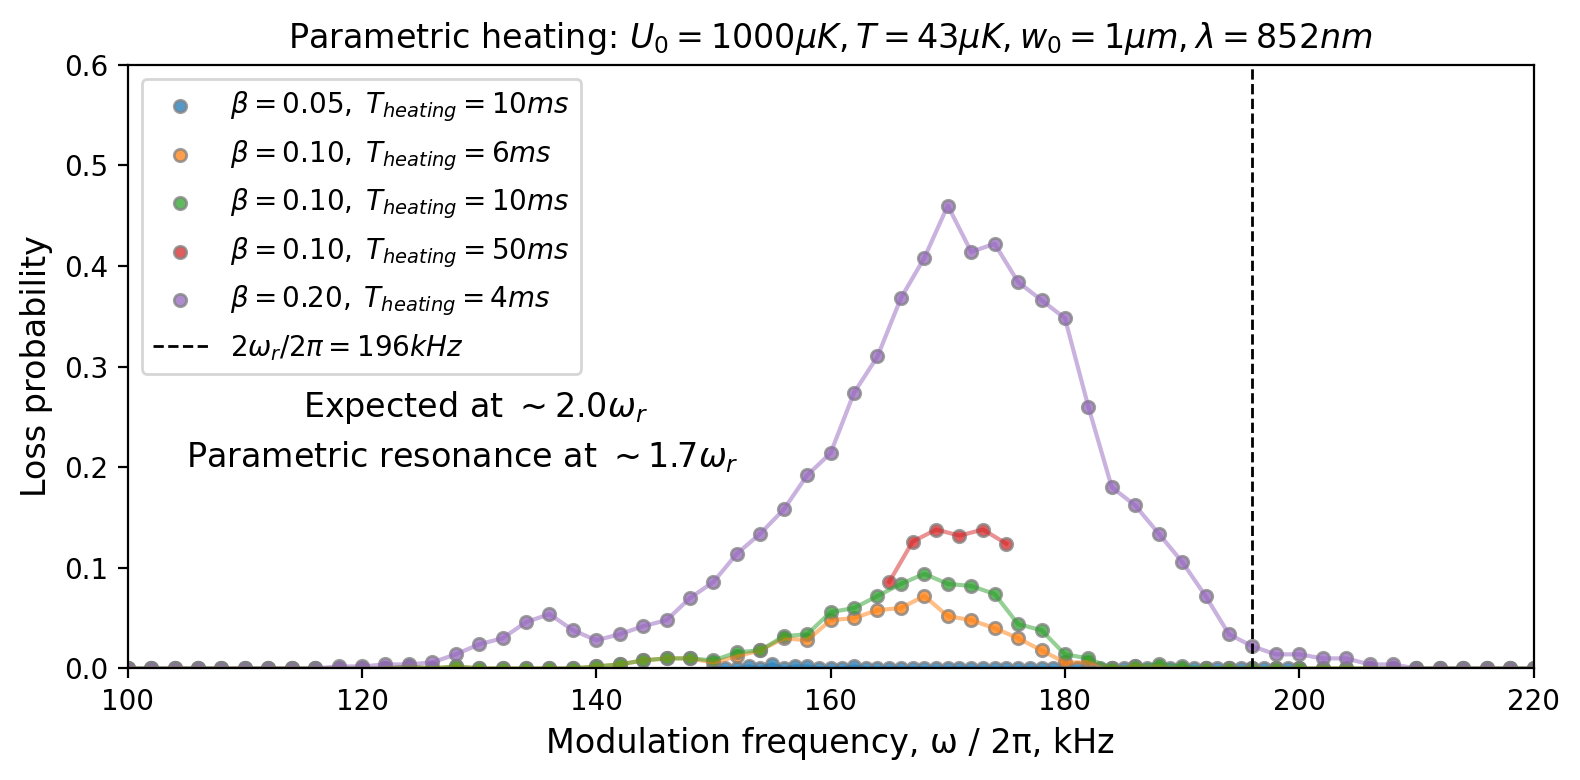

In [92]:
figure(figsize=(8,4), dpi=200)
plot(ω_list_005 * 1e3 / 2π, 1.0 .- res_005_radial, alpha=0.5)
scatter(ω_list_005 * 1e3 / 2π, 1.0 .- res_005_radial,  
    s=20, 
    label="\$ \\beta = 0.05,\\;  T_{heating} = 10 ms \$", edgecolor="gray", alpha=0.75)


plot(ω_list * 1e3 / 2π, 1.0 .- res_010_radial, alpha=0.5)
scatter(ω_list * 1e3 / 2π, 1.0 .- res_010_radial,  
    s=20, 
    label="\$ \\beta = 0.10,\\; T_{heating} = 6 ms\$", edgecolor="gray", alpha=0.75)

plot(ω_list * 1e3 / 2π, 1.0 .- res_010_10_radial, alpha=0.5)
scatter(ω_list * 1e3 / 2π, 1.0 .- res_010_10_radial,  
    s=20, 
    label="\$ \\beta = 0.10,\\; T_{heating} = 10 ms\$", edgecolor="gray", alpha=0.75)

plot(ω_list_010_50_radial * 1e3 / 2π, 1.0 .- res_010_50_radial, alpha=0.5)
scatter(ω_list_010_50_radial * 1e3 / 2π, 1.0 .- res_010_50_radial,  
    s=20, 
    label="\$ \\beta = 0.10,\\; T_{heating} = 50 ms\$", edgecolor="gray", alpha=0.75)


plot(ω_list * 1e3 / 2π, 1.0 .- res_020_radial, alpha=0.5)
scatter(ω_list * 1e3 / 2π, 1.0 .- res_020_radial,  
    s=20, 
    label="\$ \\beta = 0.20,\\;  T_{heating} = 4 ms \$", edgecolor="gray", alpha=0.75)



axvline(2*98.0, color="black", 
    linestyle="--", 
    linewidth=1, 
    label="\$ 2 \\omega_r / 2 \\pi = 196 kHz  \$")

xlabel("Modulation frequency, ω / 2π, kHz", fontsize=12)
ylabel("Loss probability", fontsize=12)

xlim(100.0, 220.0)
ylim(0.0,0.6)

text(105, 0.2, "Parametric resonance at \$ \\sim 1.7 \\omega_r \$", fontsize=12)
text(115, 0.25, "Expected at \$ \\sim 2.0 \\omega_r \$", fontsize=12)
title("Parametric heating: \$ U_0 = 1000 \\mu K, T=43 \\mu K, w_0 = 1 \\mu m ,\\lambda = 852 nm \$")

legend()
tight_layout()
savefig("data/parametric_test_many_radial.pdf", dpi=300)

_Longitudinal parametric resonance_

- $2 \times 19$ kHz - expected

- $2 \times 15$ kHz - computed


_Radial parametric resonance_

- $2 \times 98$ kHz - expected

- $2 \times 85$ kHz - computed

__Results:__

- Parametric resonances at $1.6 \omega_z$, $1.7 \omega_r$

### Switching trap on and off with variable $\Delta t$


- https://arxiv.org/pdf/physics/0003075.pdf

<img src="images/trap_on_off.jpeg" 
     align="left" 
     width="1000" />

In [185]:
function time_profile(t, t1, t2, Δt)
    return t < t1 || (t > t1+Δt && t < t1+Δt+t2) ? 0.0 : 1.0
end;

In [186]:
time_profile(20, 4, 12, 1)

1.0

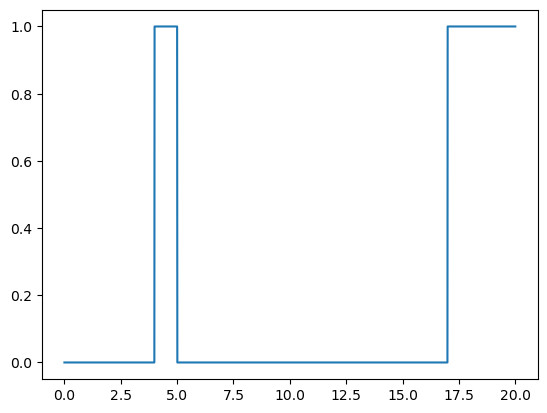

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x11ef90df0>

In [187]:
tspan = [0.0:0.01:20.0;];
t1 = 4.0;
t2 = 12.0;
plot(tspan, time_profile.(tspan, t1, t2, 1))

In [274]:
function atom_dynamics_Beguin(du, u, params, t)
    U0, w0, z0, t1, t2, Δt,  = params;
    x, y, z = u[1], u[2], u[3];
    vx, vy, vz = u[4], u[5], u[6];
    
    du[1], du[2], du[3] = vx, vy, vz;
    du[4] =  time_profile(t, t1, t2, Δt) * f(x, y, z, params) * x;
    du[5] =  time_profile(t, t1, t2, Δt) * f(x, y, z, params) * y;
    du[6] =  time_profile(t, t1, t2, Δt) * f(x, y, z, params) * (w0^2/(2.0 * z0^2) .- (x .^2 + y .^2)./(z .^2 .+ z0^2)) * z; 
end;

In [192]:
t1 = 4.0;
t2 = 12.0;

Δt_list = [0.0:0.25:25.0;];
sample_step = 25;

res_onoff = zeros(length(Δt_list));

@showprogress for j in 1:length(Δt_list)
    for i ∈ 1:sample_step:length(samples)
        tspan = (0.0, t1+t2+Δt_list[j]);
        prob = ODEProblem(atom_dynamics_Beguin, samples[i], tspan, [1000.0, 1.0, 3.7, t1, t2, Δt_list[j]]);
        sol = solve(prob, dt=1.0);
        res_onoff[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

res_onoff = res_onoff ./ (length(samples)/sample_step);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:39


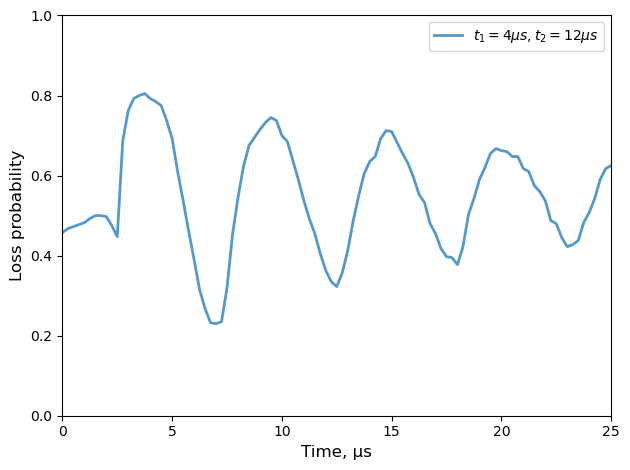

In [193]:
plot(Δt_list, 1.0 .- res_onoff, alpha=0.75, linewidth=2, label="\$ t_1 = 4\\mu s, t_2 = 12\\mu s\$")
xlabel("Time, μs", fontsize=12)
ylabel("Loss probability", fontsize=12)

xlim(0.0, 25.0)
ylim(0.0, 1.0)
legend()
tight_layout()

In [240]:
println(Δt_list[idx][1:end])
println(Δt_list[idx][3:end])
println(Δt_list[idx][1:end-2])

println(Δt_list[idx][2:end] - Δt_list[idx][1:end-1])
println(mean(Δt_list[idx][3:end] - Δt_list[idx][2:end-1]))
println(mean(Δt_list[idx][2:end] - Δt_list[idx][1:end-1]))

[3.7, 7.1, 9.5, 12.5, 15.0, 17.8, 20.4, 23.1]
[9.5, 12.5, 15.0, 17.8, 20.4, 23.1]
[3.7, 7.1, 9.5, 12.5, 15.0, 17.8]
[3.3999999999999995, 2.4000000000000004, 3.0, 2.5, 2.8000000000000007, 2.599999999999998, 2.700000000000003]
2.6666666666666665
2.771428571428572


In [244]:
period1 = 2*mean(Δt_list[idx][3:end] - Δt_list[idx][2:end-1]);
period2 = 2*mean(Δt_list[idx][2:end] - Δt_list[idx][1:end-1]);
period3 = 2*mean(Δt_list[idx][4:end] - Δt_list[idx][3:end-1]);

println(1/period1 * 1e3)
println(1/period2 * 1e3)
println(1/period3 * 1e3)

187.5
180.4123711340206
183.8235294117647


#### On-off measurements for different $t_1, t_2$

In [207]:
Δt_list = [0.0:0.25:25.0;];
sample_step = 25;

#res_onoff_t1_t2
res_onoff_4_0 = zeros(length(Δt_list));
res_onoff_4_4 = zeros(length(Δt_list));
res_onoff_4_8 = zeros(length(Δt_list));
res_onoff_4_16 = zeros(length(Δt_list));

@showprogress for j in 1:length(Δt_list)
    for i ∈ 1:sample_step:length(samples)
        tspan = (0.0, 4+4+Δt_list[j]);
        prob = ODEProblem(atom_dynamics_Beguin, samples[i], tspan, [1000.0, 1.0, 3.7, 4, 0, Δt_list[j]]);
        sol = solve(prob, dt=1.0);
        res_onoff_4_0[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

@showprogress for j in 1:length(Δt_list)
    for i ∈ 1:sample_step:length(samples)
        tspan = (0.0, 4+4+Δt_list[j]);
        prob = ODEProblem(atom_dynamics_Beguin, samples[i], tspan, [1000.0, 1.0, 3.7, 4, 4, Δt_list[j]]);
        sol = solve(prob, dt=1.0);
        res_onoff_4_4[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

@showprogress for j in 1:length(Δt_list)
    for i ∈ 1:sample_step:length(samples)
        tspan = (0.0, 4+8+Δt_list[j]);
        prob = ODEProblem(atom_dynamics_Beguin, samples[i], tspan, [1000.0, 1.0, 3.7, 4, 8, Δt_list[j]]);
        sol = solve(prob, dt=1.0);
        res_onoff_4_8[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

@showprogress for j in 1:length(Δt_list)
    for i ∈ 1:sample_step:length(samples)
        tspan = (0.0, 4+16+Δt_list[j]);
        prob = ODEProblem(atom_dynamics_Beguin, samples[i], tspan, [1000.0, 1.0, 3.7, 4, 16, Δt_list[j]]);
        sol = solve(prob, dt=1.0);
        res_onoff_4_16[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

res_onoff_4_0 = res_onoff_4_0 ./ (length(samples)/sample_step);
res_onoff_4_4 = res_onoff_4_4 ./ (length(samples)/sample_step);
res_onoff_4_8 = res_onoff_4_8 ./ (length(samples)/sample_step);
res_onoff_4_16 = res_onoff_4_16 ./ (length(samples)/sample_step);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:35
Progress: 100%|█████████████████████████████████████████| Time: 0:00:47
Progress: 100%|█████████████████████████████████████████| Time: 0:00:46
Progress: 100%|█████████████████████████████████████████| Time: 0:00:49


In [205]:
Δt_list = [0.0:0.25:25.0;];
sample_step = 25;

#res_onoff_t1_t2
res_onoff_0_8 = zeros(length(Δt_list));
res_onoff_4_8 = zeros(length(Δt_list));
res_onoff_8_8 = zeros(length(Δt_list));
res_onoff_16_8 = zeros(length(Δt_list));

@showprogress for j in 1:length(Δt_list)
    for i ∈ 1:sample_step:length(samples)
        tspan = (0.0, 0+8+Δt_list[j]);
        prob = ODEProblem(atom_dynamics_Beguin, samples[i], tspan, [1000.0, 1.0, 3.7, 0, 8, Δt_list[j]]);
        sol = solve(prob, dt=1.0);
        res_onoff_0_8[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

@showprogress for j in 1:length(Δt_list)
    for i ∈ 1:sample_step:length(samples)
        tspan = (0.0, 4+8+Δt_list[j]);
        prob = ODEProblem(atom_dynamics_Beguin, samples[i], tspan, [1000.0, 1.0, 3.7, 4, 8, Δt_list[j]]);
        sol = solve(prob, dt=1.0);
        res_onoff_4_8[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

@showprogress for j in 1:length(Δt_list)
    for i ∈ 1:sample_step:length(samples)
        tspan = (0.0, 8+8+Δt_list[j]);
        prob = ODEProblem(atom_dynamics_Beguin, samples[i], tspan, [1000.0, 1.0, 3.7, 8, 8, Δt_list[j]]);
        sol = solve(prob, dt=1.0);
        res_onoff_8_8[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

@showprogress for j in 1:length(Δt_list)
    for i ∈ 1:sample_step:length(samples)
        tspan = (0.0, 8+16+Δt_list[j]);
        prob = ODEProblem(atom_dynamics_Beguin, samples[i], tspan, [1000.0, 1.0, 3.7, 16, 8, Δt_list[j]]);
        sol = solve(prob, dt=1.0);
        res_onoff_16_8[j] += H(sol[end], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

res_onoff_0_8 = res_onoff_0_8 ./ (length(samples)/sample_step);
res_onoff_4_8 = res_onoff_4_8 ./ (length(samples)/sample_step);
res_onoff_8_8 = res_onoff_8_8 ./ (length(samples)/sample_step);
res_onoff_16_8 = res_onoff_16_8 ./ (length(samples)/sample_step);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:31
Progress: 100%|█████████████████████████████████████████| Time: 0:00:42
Progress: 100%|█████████████████████████████████████████| Time: 0:00:47
Progress: 100%|█████████████████████████████████████████| Time: 0:00:26


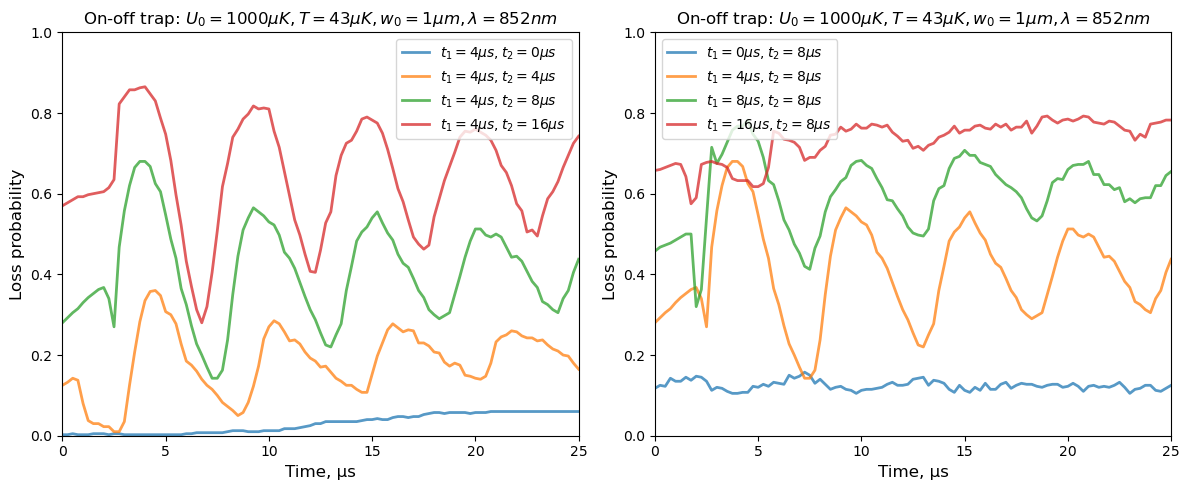

In [209]:
figure(figsize=(12,5))
subplot(121)
plot(Δt_list, 1.0 .- res_onoff_4_0, alpha=0.75, linewidth=2, label="\$ t_1 = 4\\mu s, t_2 = 0\\mu s\$")
plot(Δt_list, 1.0 .- res_onoff_4_4, alpha=0.75, linewidth=2, label="\$ t_1 = 4\\mu s, t_2 = 4\\mu s\$")
plot(Δt_list, 1.0 .- res_onoff_4_8, alpha=0.75, linewidth=2, label="\$ t_1 = 4\\mu s, t_2 = 8\\mu s\$")
plot(Δt_list, 1.0 .- res_onoff_4_16, alpha=0.75, linewidth=2, label="\$ t_1 = 4\\mu s, t_2 = 16\\mu s\$")

xlabel("Time, μs", fontsize=12)
ylabel("Loss probability", fontsize=12)
xlim(0.0, 25.0)
ylim(0.0, 1.0)
legend()
title("On-off trap: \$ U_0 = 1000 \\mu K, T=43 \\mu K, w_0 = 1 \\mu m ,\\lambda = 852 nm \$")

subplot(122)
plot(Δt_list, 1.0 .- res_onoff_0_8, alpha=0.75, linewidth=2, label="\$ t_1 = 0\\mu s, t_2 = 8\\mu s\$")
plot(Δt_list, 1.0 .- res_onoff_4_8, alpha=0.75, linewidth=2, label="\$ t_1 = 4\\mu s, t_2 = 8\\mu s\$")
plot(Δt_list, 1.0 .- res_onoff_8_8, alpha=0.75, linewidth=2, label="\$ t_1 = 8\\mu s, t_2 = 8\\mu s\$")
plot(Δt_list, 1.0 .- res_onoff_16_8, alpha=0.75, linewidth=2, label="\$ t_1 = 16\\mu s, t_2 = 8\\mu s\$")

xlabel("Time, μs", fontsize=12)
ylabel("Loss probability", fontsize=12)
xlim(0.0, 25.0)
ylim(0.0, 1.0)
legend()
title("On-off trap: \$ U_0 = 1000 \\mu K, T=43 \\mu K, w_0 = 1 \\mu m ,\\lambda = 852 nm \$")

tight_layout()
savefig("data/onoff_trap_many.pdf", dpi=200)

__1D case__

__Rate of parametric heating in 3D.__

In harmonic approximation heating is exponential. What happens with exact solution?

In [ ]:
tspan = (0.0, 2e3);

ω_list = [0.0:0.005:0.4;];
res_energy = zeros(length(ω_list));
step = 10;


@showprogress for i ∈ 1:step:length(samples)
    prob = ODEProblem(atom_dynamics, samples[i], tspan, [1000.0, 1.0, 3.7, 2\pi * 30.0 * 1e-3, 0.4]);
    sol = solve(prob,dt=10.0);
    res_energy[j] += H(sol[end], [1000.0, 1.0, 3.7], m);
end;


res_adaptive = res_adaptive ./ (length(samples)/step);

In [340]:
prob = ODEProblem(atom_dynamics, samples[100], tspan, [1000.0, 1.0, 3.7, 2π * 30.0 * 1e-3, 0.4]);
sol = solve(prob, dt=1.0);

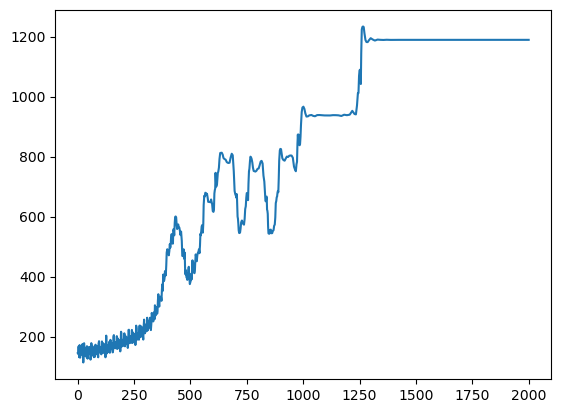

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1b329e7d0>

In [350]:
sol_H = [];

for k in 1:length(sol.t)
    append!(sol_H, H(sol[k], [1000.0, 1.0, 3.7], m));
end;

plot(sol.t, sol_H)

### Parametric excitation in 1D

In [162]:
function atom_dynamics_1D_z(du, u, params, t)
    U0, w0, z0, ω, β = params;
    z = u[1];
    vz = u[2];

    du[1] = vz;
    du[2] = -(1.0 .+ β * sin.(ω * t)) * 2.0 * U0/m * vconst^2 * z ./ ((1.0 .+ (z ./ z0) .^2) * z0^2);
end;

function atom_dynamics_1D_r(du, u, params, t)
    U0, w0, z0, ω, β = params;
    r = u[1];
    vr = u[2];

    du[1] = vr;
    du[2] = -(1.0 .+ β * sin.(ω * t)) * 4.0 * U0/m * exp.(-2*r .^2 ./ w0^2) * vconst^2 * r ./ w0^2;
end;

In [166]:
tspan = (0.0, 10e3);

ω_list = [0.0:0.01:1.5;];
res_1D_z = zeros(length(ω_list));
res_1D_r = zeros(length(ω_list));
step = 100;

@showprogress for j in 1:length(ω_list)
    for i ∈ 1:step:length(samples)
        prob_z = ODEProblem(atom_dynamics_1D_z, [samples[i][3], samples[i][6]], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.4]);
        sol_z = solve(prob_z, dt=1.0);
        res_1D_z[j] += H([0.0, 0.0, sol_z[end][1], 0.0, 0.0, sol_z[end][2]], [1000.0, 1.0, 3.7], m) < 1000.0;
        
        prob_r = ODEProblem(atom_dynamics_1D_r, [samples[i][1], samples[i][4]], tspan, [1000.0, 1.0, 3.7, ω_list[j], 0.4]);
        sol_r = solve(prob_r, dt=1.0);
        res_1D_r[j] += H([sol_r[end][1], 0.0, 0.0, sol_r[end][2], 0.0, 0.0], [1000.0, 1.0, 3.7], m) < 1000.0;
    end;
end;

res_1D_z = res_1D_z ./ (length(samples)/step);
res_1D_r = res_1D_r ./ (length(samples)/step);

Progress: 100%|█████████████████████████████████████████| Time: 0:13:49


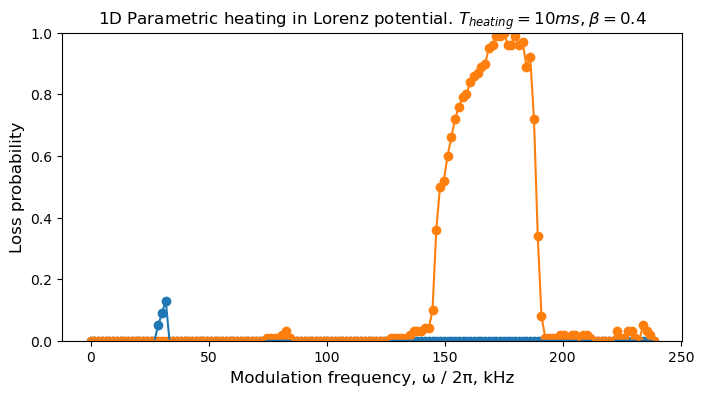

PyObject Text(0.5, 1.0, '1D Parametric heating in Lorenz potential. $T_{heating}=10ms, \\beta = 0.4$')

In [167]:
figure(figsize=(8,4))
plot(ω_list * 1e3 / 2π, 1 .-res_1D_z)
scatter(ω_list * 1e3 / 2π, 1 .-res_1D_z, label="Longitudinal")

plot(ω_list * 1e3 / 2π, 1 .-res_1D_r)
scatter(ω_list * 1e3 / 2π, 1 .-res_1D_r, label="Longitudinal")

xlabel("Modulation frequency, ω / 2π, kHz", fontsize=12)
ylabel("Loss probability", fontsize=12)
ylim(0.0, 1.0)

title("1D Parametric heating in Lorenz potential. \$T_{heating}=10ms, \\beta = 0.4\$")

Heating in 1D Lorenz trap is significantly slower than in 1D Gaussian 

In [6]:
using CSV
using DataFrames

In [85]:
filename = "data/2023_10_30_RESONANCE_SCAN.dat";


LoadError: ArgumentError: provide a valid sink argument, like `using DataFrames; CSV.read(source, DataFrame)`

In [158]:
header = 18;

x = [];
y = [];

open(filename) do file
    i = 1;
    for line in eachline(file)
        if i >= header
            append!(x, parse(Float64, line[5:12]));
            append!(y, parse(Float64, line[21:25]));
        end;
        i += 1;
    end;
end;

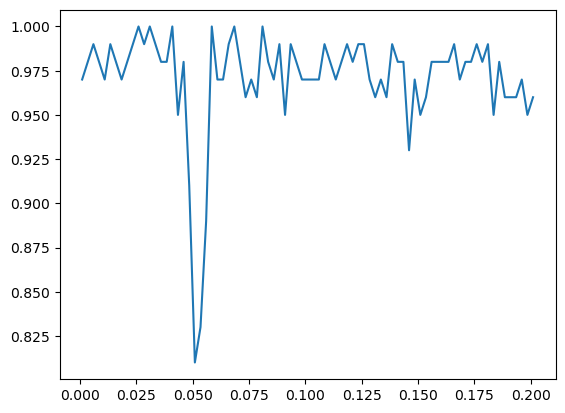

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x11e7564a0>

In [159]:
plot(x, y)

In [160]:
0.05 * 1e3

50.0

In [161]:
50, 140

(50, 140)

### Adiabatic trap lowering 

<img src="images/adiabatic.png" 
     align="left" 
     width="800" />

In [26]:
function trap_lowering(t, U0, U1, t1)
    return (U1 - U0)/t1 * t .+ U0;
end;

In [27]:
function atom_dynamics_adiabatic(du, u, params, t)
    U0, w0, z0, U1, t1 = params;
    x, y, z = u[1], u[2], u[3];
    vx, vy, vz = u[4], u[5], u[6];
    
    du[1], du[2], du[3] = vx, vy, vz;
    du[4] =  trap_lowering(t, U0, U1, t1) * f(x, y, z, [1.0, w0, z0]) * x;
    du[5] =  trap_lowering(t, U0, U1, t1) * f(x, y, z, [1.0, w0, z0]) * y;
    du[6] =  trap_lowering(t, U0, U1, t1) * f(x, y, z, [1.0, w0, z0]) * (w0^2/(2.0 * z0^2) .- (x .^2 + y .^2)./(z .^2 .+ z0^2)) * z; 
end;

In [28]:
U1_list = 10.0 .^ ([-2.0:0.1:3.0;]);
sample_step = 10;
#If you change U0, w0 or z0 you need to resample atoms in MCMC
U0 = 1000.0;


res_10 = zeros(length(U1_list));
res_25 = zeros(length(U1_list));
res_50 = zeros(length(U1_list));
res_100 = zeros(length(U1_list));
res_250 = zeros(length(U1_list));

t1 = 10.0;
tspan = (0.0, t1);
@showprogress for j in 1:length(U1_list)
    for i ∈ 1:sample_step:length(samples)
        prob = ODEProblem(atom_dynamics_adiabatic, samples[i], tspan, [U0, 1.0, 3.7, U1_list[j], t1]);
        sol = solve(prob; dt=0.001);
        res_10[j] += H(sol[end], [U1_list[j], 1.0, 3.7], m) < U1_list[j];
    end;
end;

t1 = 25.0;
tspan = (0.0, t1);
@showprogress for j in 1:length(U1_list)
    for i ∈ 1:sample_step:length(samples)
        prob = ODEProblem(atom_dynamics_adiabatic, samples[i], tspan, [U0, 1.0, 3.7, U1_list[j], t1]);
        sol = solve(prob; dt=0.001);
        res_25[j] += H(sol[end], [U1_list[j], 1.0, 3.7], m) < U1_list[j];
    end;
end;

t1 = 50.0;
tspan = (0.0, t1);
@showprogress for j in 1:length(U1_list)
    for i ∈ 1:sample_step:length(samples)
        prob = ODEProblem(atom_dynamics_adiabatic, samples[i], tspan, [U0, 1.0, 3.7, U1_list[j], t1]);
        sol = solve(prob; dt=0.001);
        res_50[j] += H(sol[end], [U1_list[j], 1.0, 3.7], m) < U1_list[j];
    end;
end;

t1 = 100.0;
tspan = (0.0, t1);
@showprogress for j in 1:length(U1_list)
    for i ∈ 1:sample_step:length(samples)
        prob = ODEProblem(atom_dynamics_adiabatic, samples[i], tspan, [U0, 1.0, 3.7, U1_list[j], t1]);
        sol = solve(prob; dt=0.001);
        res_100[j] += H(sol[end], [U1_list[j], 1.0, 3.7], m) < U1_list[j];
    end;
end;

t1 = 250.0;
tspan = (0.0, t1);
@showprogress for j in 1:length(U1_list)
    for i ∈ 1:sample_step:length(samples)
        prob = ODEProblem(atom_dynamics_adiabatic, samples[i], tspan, [U0, 1.0, 3.7, U1_list[j], t1]);
        sol = solve(prob; dt=0.001);
        res_250[j] += H(sol[end], [U1_list[j], 1.0, 3.7], m) < U1_list[j];
    end;
end;

res_10 = res_10 ./ (length(samples)/sample_step);
res_25 = res_25 ./ (length(samples)/sample_step);
res_50 = res_50 ./ (length(samples)/sample_step);
res_100 = res_100 ./ (length(samples)/sample_step);
res_250 = res_250 ./ (length(samples)/sample_step);

Progress:   4%|█▋                                       |  ETA: 0:02:23

Progress:  10%|████                                     |  ETA: 0:01:08

Progress:  12%|████▉                                    |  ETA: 0:00:58

Progress:  14%|█████▋                                   |  ETA: 0:00:52

Progress:  16%|██████▍                                  |  ETA: 0:00:47

Progress:  18%|███████▎                                 |  ETA: 0:00:42

Progress:  20%|████████                                 |  ETA: 0:00:38

Progress:  22%|████████▉                                |  ETA: 0:00:35

Progress:  24%|█████████▋                               |  ETA: 0:00:33

Progress:  25%|██████████▌                              |  ETA: 0:00:31

Progress:  27%|███████████▎                             |  ETA: 0:00:29

Progress:  29%|████████████                             |  ETA: 0:00:27

Progress:  31%|████████████▉                            |  ETA: 0:00:25

Progress:  33%|█████████████▋                           |  ETA: 0:00:24

Progress:  35%|██████████████▌                          |  ETA: 0:00:22

Progress:  37%|███████████████▎                         |  ETA: 0:00:21

Progress:  39%|████████████████▏                        |  ETA: 0:00:20

Progress:  41%|████████████████▉                        |  ETA: 0:00:19

Progress:  43%|█████████████████▋                       |  ETA: 0:00:18

Progress:  45%|██████████████████▌                      |  ETA: 0:00:17

Progress:  47%|███████████████████▎                     |  ETA: 0:00:16

Progress:  49%|████████████████████▏                    |  ETA: 0:00:15

Progress:  51%|████████████████████▉                    |  ETA: 0:00:15

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:14

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:13

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:13

Progress:  59%|████████████████████████▏                |  ETA: 0:00:12

Progress:  61%|████████████████████████▉                |  ETA: 0:00:11

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:10

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:10

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:09

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:08

Progress:  71%|█████████████████████████████            |  ETA: 0:00:08

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:07

Progress:  75%|██████████████████████████████▌          |  ETA: 0:00:07

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:06

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:06

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:05

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:05

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:04

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:03

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:03

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:02

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:02

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:01

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:24


Progress:   4%|█▋                                       |  ETA: 0:00:30

Progress:   6%|██▍                                      |  ETA: 0:00:29

Progress:   8%|███▎                                     |  ETA: 0:00:27

Progress:  10%|████                                     |  ETA: 0:00:26

Progress:  12%|████▉                                    |  ETA: 0:00:24

Progress:  14%|█████▋                                   |  ETA: 0:00:23

Progress:  16%|██████▍                                  |  ETA: 0:00:22

Progress:  18%|███████▎                                 |  ETA: 0:00:24

Progress:  20%|████████                                 |  ETA: 0:00:24

Progress:  22%|████████▉                                |  ETA: 0:00:23

Progress:  24%|█████████▋                               |  ETA: 0:00:22

Progress:  25%|██████████▌                              |  ETA: 0:00:22

Progress:  27%|███████████▎                             |  ETA: 0:00:21

Progress:  29%|████████████                             |  ETA: 0:00:20

Progress:  31%|████████████▉                            |  ETA: 0:00:20

Progress:  33%|█████████████▋                           |  ETA: 0:00:20

Progress:  35%|██████████████▌                          |  ETA: 0:00:19

Progress:  37%|███████████████▎                         |  ETA: 0:00:18

Progress:  39%|████████████████▏                        |  ETA: 0:00:17

Progress:  41%|████████████████▉                        |  ETA: 0:00:17

Progress:  43%|█████████████████▋                       |  ETA: 0:00:16

Progress:  45%|██████████████████▌                      |  ETA: 0:00:16

Progress:  47%|███████████████████▎                     |  ETA: 0:00:15

Progress:  49%|████████████████████▏                    |  ETA: 0:00:15

Progress:  51%|████████████████████▉                    |  ETA: 0:00:14

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:13

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:13

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:12

Progress:  59%|████████████████████████▏                |  ETA: 0:00:12

Progress:  61%|████████████████████████▉                |  ETA: 0:00:11

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:11

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:10

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:09

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:09

Progress:  71%|█████████████████████████████            |  ETA: 0:00:08

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:08

Progress:  75%|██████████████████████████████▌          |  ETA: 0:00:07

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:06

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:06

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:05

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:05

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:04

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:04

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:03

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:03

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:02

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:02

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:00:27


Progress:   4%|█▋                                       |  ETA: 0:00:34

Progress:   6%|██▍                                      |  ETA: 0:00:33

Progress:   8%|███▎                                     |  ETA: 0:00:32

Progress:  10%|████                                     |  ETA: 0:00:31

Progress:  12%|████▉                                    |  ETA: 0:00:30

Progress:  14%|█████▋                                   |  ETA: 0:00:29

Progress:  16%|██████▍                                  |  ETA: 0:00:29

Progress:  18%|███████▎                                 |  ETA: 0:00:28

Progress:  20%|████████                                 |  ETA: 0:00:27

Progress:  22%|████████▉                                |  ETA: 0:00:26

Progress:  24%|█████████▋                               |  ETA: 0:00:26

Progress:  25%|██████████▌                              |  ETA: 0:00:25

Progress:  27%|███████████▎                             |  ETA: 0:00:24

Progress:  29%|████████████                             |  ETA: 0:00:24

Progress:  31%|████████████▉                            |  ETA: 0:00:23

Progress:  33%|█████████████▋                           |  ETA: 0:00:22

Progress:  35%|██████████████▌                          |  ETA: 0:00:22

Progress:  37%|███████████████▎                         |  ETA: 0:00:21

Progress:  39%|████████████████▏                        |  ETA: 0:00:20

Progress:  41%|████████████████▉                        |  ETA: 0:00:20

Progress:  43%|█████████████████▋                       |  ETA: 0:00:19

Progress:  45%|██████████████████▌                      |  ETA: 0:00:18

Progress:  47%|███████████████████▎                     |  ETA: 0:00:18

Progress:  49%|████████████████████▏                    |  ETA: 0:00:17

Progress:  51%|████████████████████▉                    |  ETA: 0:00:16

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:16

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:15

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:15

Progress:  59%|████████████████████████▏                |  ETA: 0:00:14

Progress:  61%|████████████████████████▉                |  ETA: 0:00:13

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:13

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:12

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:11

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:11

Progress:  71%|█████████████████████████████            |  ETA: 0:00:10

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:09

Progress:  75%|██████████████████████████████▌          |  ETA: 0:00:09

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:08

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:07

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:07

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:06

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:06

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:05

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:04

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:03

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:03

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:02

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:00:36


Progress:   4%|█▋                                       |  ETA: 0:00:56

Progress:   6%|██▍                                      |  ETA: 0:00:57

Progress:   8%|███▎                                     |  ETA: 0:00:59

Progress:  10%|████                                     |  ETA: 0:00:57

Progress:  12%|████▉                                    |  ETA: 0:00:55

Progress:  14%|█████▋                                   |  ETA: 0:00:55

Progress:  16%|██████▍                                  |  ETA: 0:00:53

Progress:  18%|███████▎                                 |  ETA: 0:00:51

Progress:  20%|████████                                 |  ETA: 0:00:51

Progress:  22%|████████▉                                |  ETA: 0:00:50

Progress:  24%|█████████▋                               |  ETA: 0:00:49

Progress:  25%|██████████▌                              |  ETA: 0:00:48

Progress:  27%|███████████▎                             |  ETA: 0:00:46

Progress:  29%|████████████                             |  ETA: 0:00:45

Progress:  31%|████████████▉                            |  ETA: 0:00:44

Progress:  33%|█████████████▋                           |  ETA: 0:00:43

Progress:  35%|██████████████▌                          |  ETA: 0:00:44

Progress:  37%|███████████████▎                         |  ETA: 0:00:44

Progress:  39%|████████████████▏                        |  ETA: 0:00:43

Progress:  41%|████████████████▉                        |  ETA: 0:00:42

Progress:  43%|█████████████████▋                       |  ETA: 0:00:41

Progress:  45%|██████████████████▌                      |  ETA: 0:00:39

Progress:  47%|███████████████████▎                     |  ETA: 0:00:39

Progress:  49%|████████████████████▏                    |  ETA: 0:00:37

Progress:  51%|████████████████████▉                    |  ETA: 0:00:36

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:34

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:33

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:31

Progress:  59%|████████████████████████▏                |  ETA: 0:00:30

Progress:  61%|████████████████████████▉                |  ETA: 0:00:28

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:27

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:26

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:24

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:23

Progress:  71%|█████████████████████████████            |  ETA: 0:00:21

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:20

Progress:  75%|██████████████████████████████▌          |  ETA: 0:00:18

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:17

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:15

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:14

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:13

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:11

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:10

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:08

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:07

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:06

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:04

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:03

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


Progress:   4%|█▋                                       |  ETA: 0:02:10

Progress:   6%|██▍                                      |  ETA: 0:02:04

Progress:   8%|███▎                                     |  ETA: 0:02:06

Progress:  10%|████                                     |  ETA: 0:02:06

Progress:  12%|████▉                                    |  ETA: 0:02:06

Progress:  14%|█████▋                                   |  ETA: 0:02:05

Progress:  16%|██████▍                                  |  ETA: 0:02:02

Progress:  18%|███████▎                                 |  ETA: 0:01:58

Progress:  20%|████████                                 |  ETA: 0:01:56

Progress:  22%|████████▉                                |  ETA: 0:01:53

Progress:  24%|█████████▋                               |  ETA: 0:01:50

Progress:  25%|██████████▌                              |  ETA: 0:01:49

Progress:  27%|███████████▎                             |  ETA: 0:01:52

Progress:  29%|████████████                             |  ETA: 0:01:53

Progress:  31%|████████████▉                            |  ETA: 0:01:50

Progress:  33%|█████████████▋                           |  ETA: 0:01:46

Progress:  35%|██████████████▌                          |  ETA: 0:01:42

Progress:  37%|███████████████▎                         |  ETA: 0:01:38

Progress:  39%|████████████████▏                        |  ETA: 0:01:36

Progress:  41%|████████████████▉                        |  ETA: 0:01:32

Progress:  43%|█████████████████▋                       |  ETA: 0:01:28

Progress:  45%|██████████████████▌                      |  ETA: 0:01:24

Progress:  47%|███████████████████▎                     |  ETA: 0:01:21

Progress:  49%|████████████████████▏                    |  ETA: 0:01:18

Progress:  51%|████████████████████▉                    |  ETA: 0:01:15

Progress:  53%|█████████████████████▊                   |  ETA: 0:01:12

Progress:  55%|██████████████████████▌                  |  ETA: 0:01:09

Progress:  57%|███████████████████████▍                 |  ETA: 0:01:05

Progress:  59%|████████████████████████▏                |  ETA: 0:01:02

Progress:  61%|████████████████████████▉                |  ETA: 0:00:59

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:55

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:52

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:49

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:46

Progress:  71%|█████████████████████████████            |  ETA: 0:00:43

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:40

Progress:  75%|██████████████████████████████▌          |  ETA: 0:00:37

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:34

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:31

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:28

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:26

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:23

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:20

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:17

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:14

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:11

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:08

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:06

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:03

Progress: 100%|█████████████████████████████████████████| Time: 0:02:24


In [29]:
function nice_plot(x, y, label)
    plot(x, y, alpha=0.75, linewidth=2)
    scatter(x, y,
        alpha=0.75, 
        edgecolors="grey", 
        s=50,
        zorder=2,
        label=label)
end;

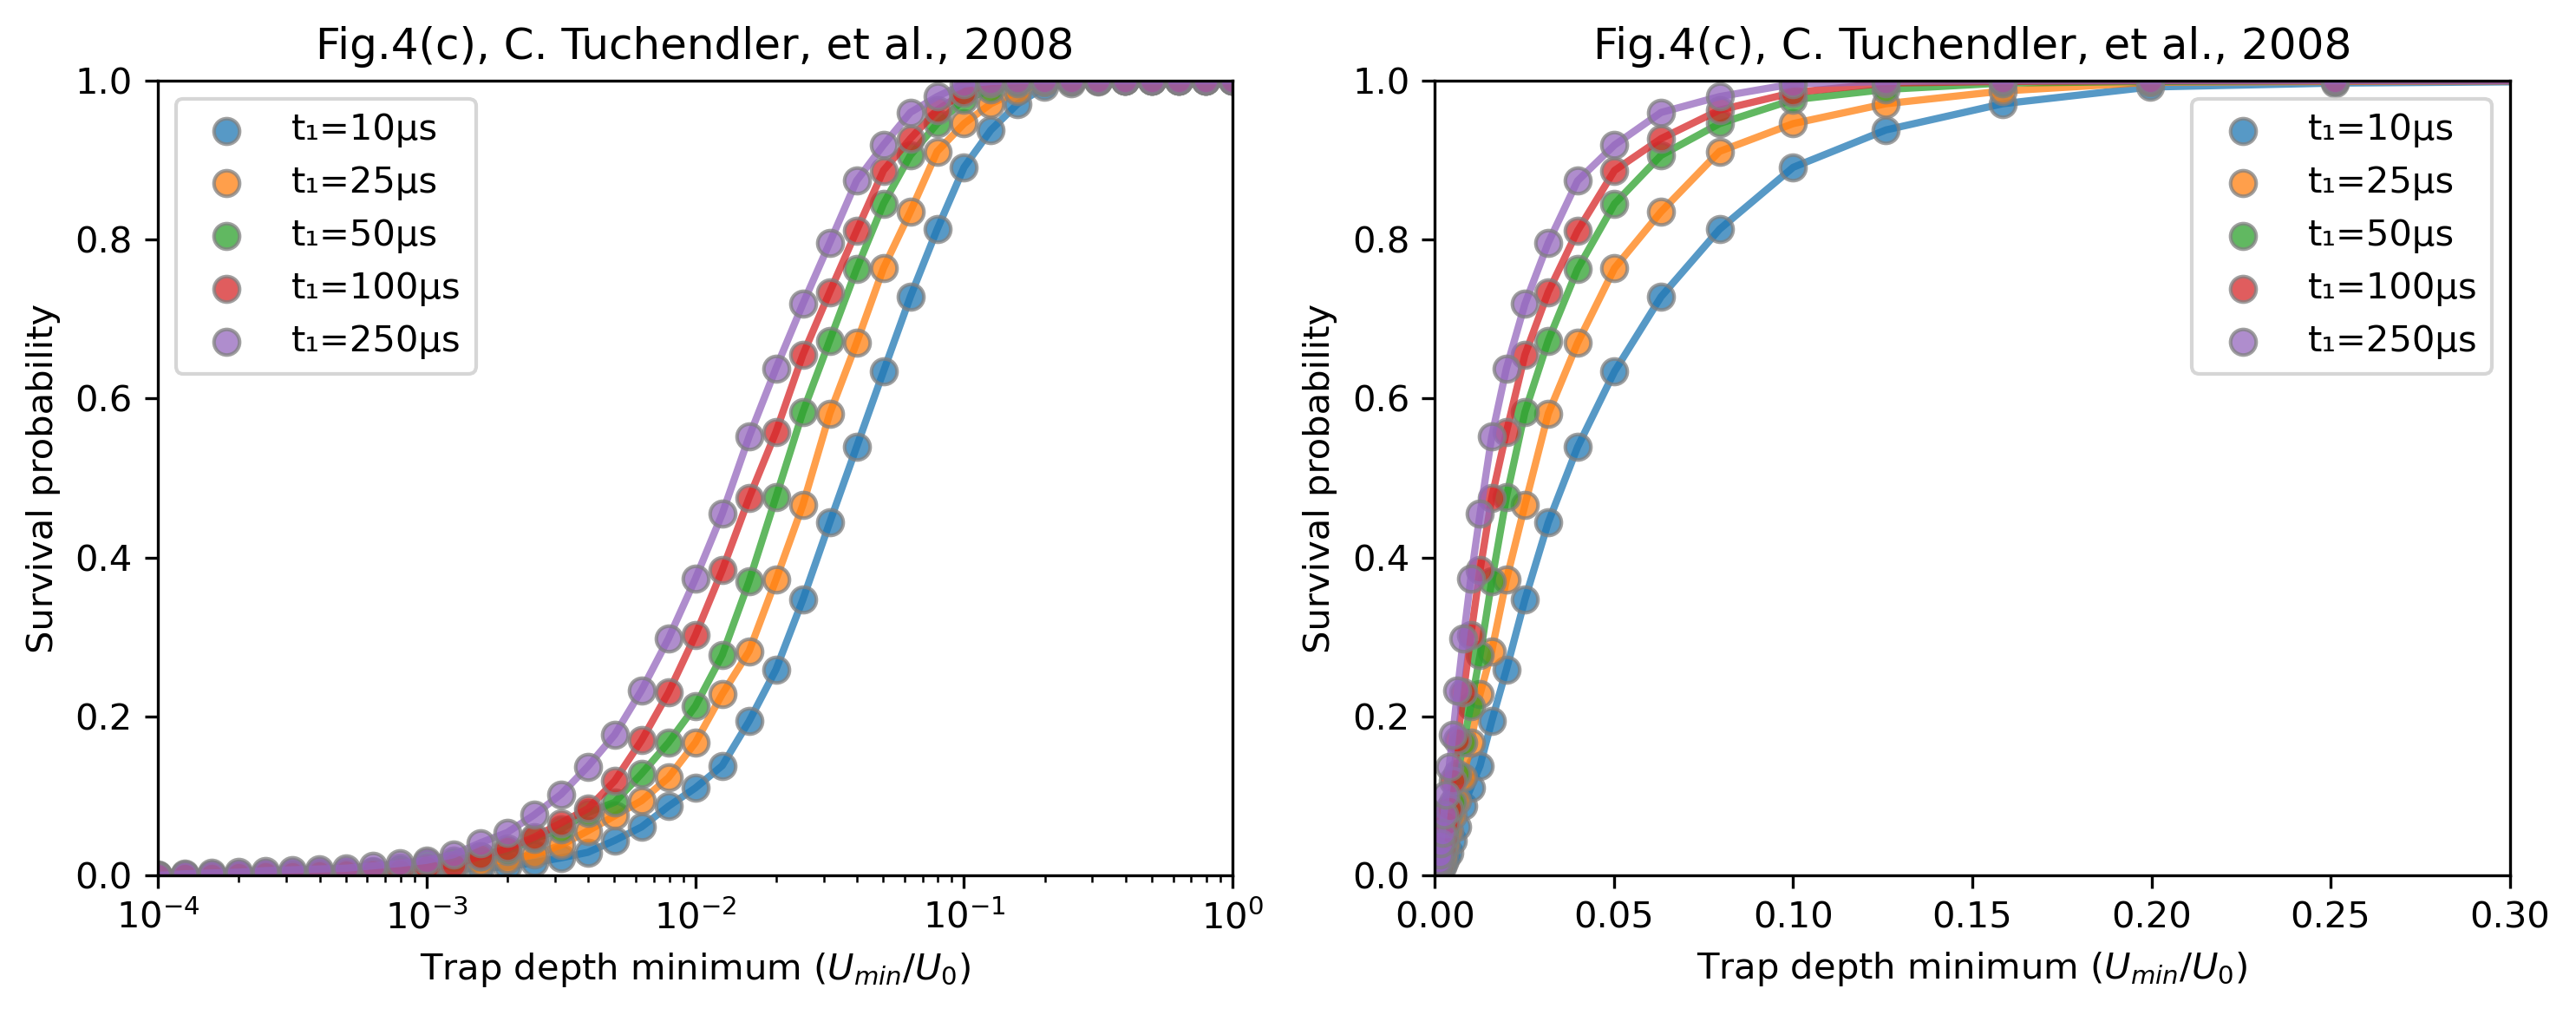

In [31]:
figure(figsize=(10,4), dpi=300)

subplot(121)
nice_plot(U1_list ./ U0, res_10, "t₁=10μs")
nice_plot(U1_list ./ U0, res_25, "t₁=25μs")
nice_plot(U1_list ./ U0, res_50, "t₁=50μs")
nice_plot(U1_list ./ U0, res_100, "t₁=100μs")
nice_plot(U1_list ./ U0, res_250, "t₁=250μs")


xlabel("Trap depth minimum \$ (U_{min}/U_0) \$")
ylabel("Survival probability")
legend()
xscale("log")
xlim(10 ^(-4), 1.0)
ylim(0.0, 1.0)
title("Fig.4(c), C. Tuchendler, et al., 2008")



subplot(122)
nice_plot(U1_list ./ U0, res_10, "t₁=10μs")
nice_plot(U1_list ./ U0, res_25, "t₁=25μs")
nice_plot(U1_list ./ U0, res_50, "t₁=50μs")
nice_plot(U1_list ./ U0, res_100, "t₁=100μs")
nice_plot(U1_list ./ U0, res_250, "t₁=250μs")


xlabel("Trap depth minimum \$ (U_{min}/U_0) \$")
ylabel("Survival probability")
legend()
xlim(0.0, 0.3)
ylim(0.0, 1.0)
title("Fig.4(c), C. Tuchendler, et al., 2008")



tight_layout()
gcf()

# savefig("data/trap_lowering_fig4.pdf", dpi=300)

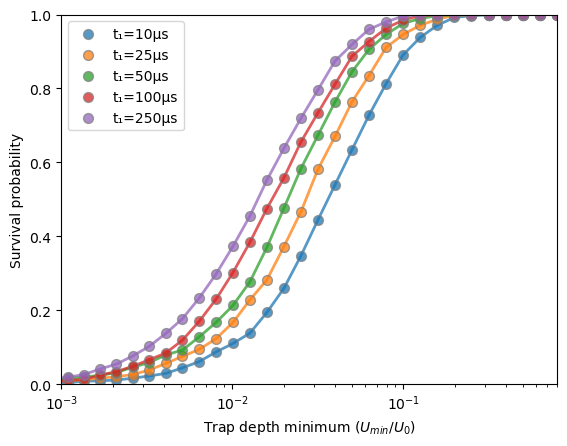

In [41]:
shift = 1e-4;

figure()
nice_plot(shift .+ U1_list ./ U0, res_10, "t₁=10μs")
nice_plot(shift .+ U1_list ./ U0, res_25, "t₁=25μs")
nice_plot(shift .+ U1_list ./ U0, res_50, "t₁=50μs")
nice_plot(shift .+ U1_list ./ U0, res_100, "t₁=100μs")
nice_plot(shift .+ U1_list ./ U0, res_250, "t₁=250μs")
xscale("log")


xlabel("Trap depth minimum \$ (U_{min}/U_0) \$")
ylabel("Survival probability")
legend()
xlim(1e-3, 0.8)
ylim(0.0, 1.0)
gcf()

## Trap depth through AC Stark shifts